<a href="https://colab.research.google.com/github/starluvr3579/SRMP/blob/main/linear_regression_feb6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
def train(y, X):
    """

    Args:
        y (array): An Nstar array of rotation periods.
        X (array): An Nstar x NX array of features.

    Returns:
        weights (array): The array of weights of length NX + 1.

    """
    A = np.concatenate((np.ones((len(X), 1)), X), axis=1)  # Shape: Nstars x Nfeatures (incl crossterms)
    AT = A.T
    ATA = np.dot(AT, A)

    weights = np.linalg.solve(ATA, np.dot(AT, y))
    return weights

def normalize(x):
    return (x-min(x))/(max(x)-min(x))

df1 = pd.read_csv('Gaia_Prot_cmatch.csv')

In [30]:
features = [df1["bp_g"], df1["pmdec"], df1["g_rp"], df1["abs_G"], df1["bp_rp"],
            df1["pmra"], df1["dr2_radial_velocity"],df1["ra_dec_corr"], df1["parallax"], df1["teff_calc"], df1["Prot"]]

m = np.isfinite(df1["bp_g"].values)
for f in features[1:]:
    m &= np.isfinite(f.values)

df = df1.iloc[m]
print(np.shape(df), np.shape(df1))

(5647, 103) (94064, 103)


In [20]:
y = df.Prot.values

In [32]:
from itertools import combinations_with_replacement

args = normalize(df["bp_g"]),  normalize(df["pmdec"]), normalize(df["g_rp"]), \
        normalize(df["abs_G"]), normalize(df["bp_rp"]), normalize(df["dr2_radial_velocity"]), normalize(df["pmra"]),\
        normalize(df["ra_dec_corr"]), normalize(df["teff_calc"]), normalize(df["parallax"])

X = list(args)
"""for a, b in combinations_with_replacement(args, 2):
    X.append(a * b)"""
X = np.array(X).T

names = ['bp_g', 'pmdec', 'g_rp', 'abs_G', 'bp_rp', 'dr2_radial_velocity', 'pmra', 'ra_dec_corr', 'teff_calc', 'parallax']
X_names = list(names)
"""for a, b in combinations_with_replacement(names, 2):
    X_names.append(a + '*' + b)"""
X_names = np.array(X_names).T

print(np.shape(X), len(args), len(names))

(5647, 10) 10 10


In [33]:
# Define the number of training and validating stars.
Ntrain = int(0.8*len(y))

# Choose stars at random and split.
shuffle_inds = np.arange(len(y))
np.random.shuffle(shuffle_inds)
train_inds = shuffle_inds[:Ntrain]
test_inds = shuffle_inds[Ntrain:]
y_train, X_train = y[train_inds], X[train_inds, :]
y_test, X_test = y[test_inds], X[test_inds, :]

In [34]:
weights = train(y_train, X_train)

In [35]:
A = np.concatenate((np.ones((len(X_test), 1)), X_test), axis=1)
y_predict = np.dot(weights.T, A.T)

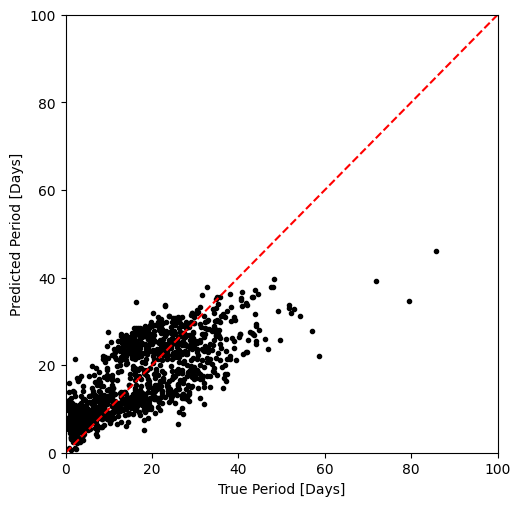

In [38]:
import matplotlib.pyplot as plt
xs = np.linspace(0, 100, 10)

plt.figure(figsize=(6, 6), dpi=100)
plt.plot(y_test, y_predict.T, "k.")
plt.plot(xs, xs, "r--")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel("True Period [Days]")
plt.ylabel("Predicted Period [Days]")
plt.subplots_adjust(left=.18, bottom=.15)

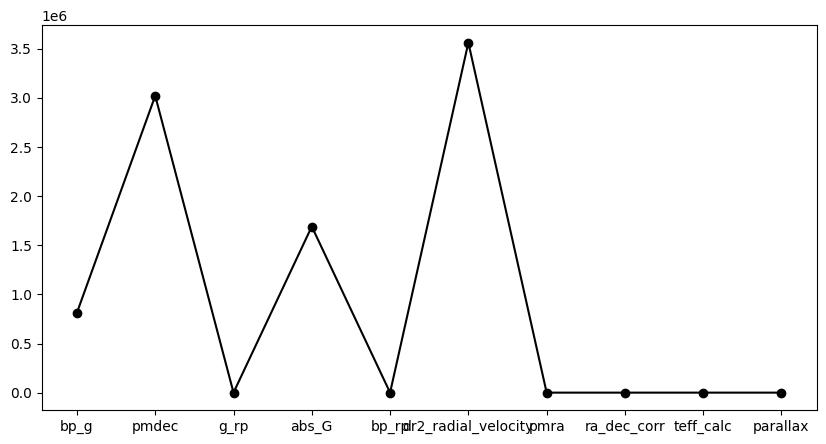

In [37]:
plt.figure(figsize=(10,5))
plt.plot(X_names, abs(weights[:-1]), 'k-o')

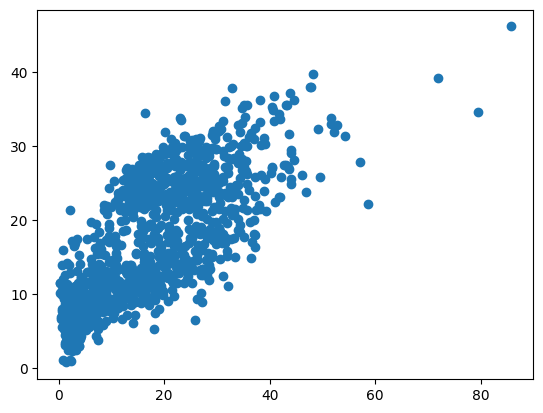

In [56]:
m=(y_test>40)
p_test,p_pre=(y_test, y_predict.T,)
plt.plot(p_test,p_pre, 'o')

In [57]:
bias=(np.mean(y_test-y_predict.T))
print(bias)

0.09092573673278335
